In [1]:
import numpy as np
from scipy.ndimage import imread
import matplotlib.pyplot as plt
import fourier_transform as ft
from scipy import fftpack
% matplotlib inline

## Working on orientation

In [2]:
sweet_image_descriptions = {
#                 33:"puppies!",
                55:"caw caw, motherfucker",
#                 57:"ugly duck",
#                 81:"wood paneling",
                113:"pencils vertical",
                114:"pencils horizontal",
#                 115:"georgia o'keefe"
                }

sweet_images = [
    {"id" : img_id,
     "description" : description,
     "image" : imread('/Users/sekunder/python/SWDB/SWDB-KART/images/NS_stimulus_images/NS_' + str(img_id) + '.png',
                      flatten = True)
    } for img_id,description in sweet_image_descriptions.items()]

('for pencils vertical, coordinates are ', '144.0', '216.0', 'radius is', 25.495097567963924)
('for pencils horizontal, coordinates are ', '144.0', '216.0', 'radius is', 20.591260281974002)
('for caw caw, motherfucker, coordinates are ', '144.0', '216.0', 'radius is', 28.42534080710379)


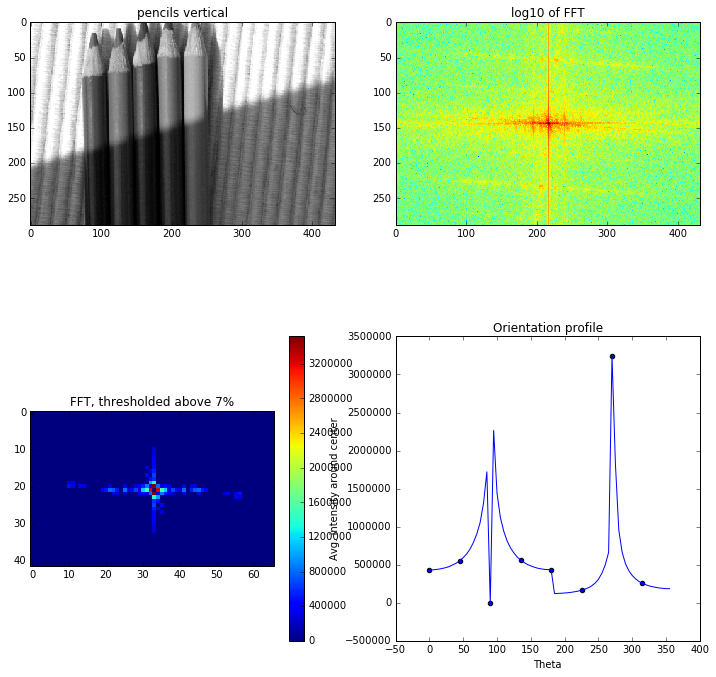

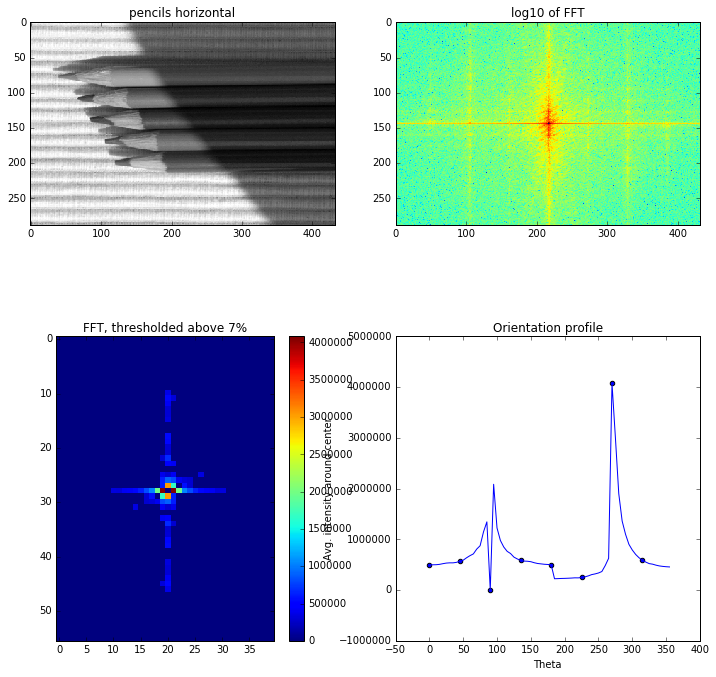

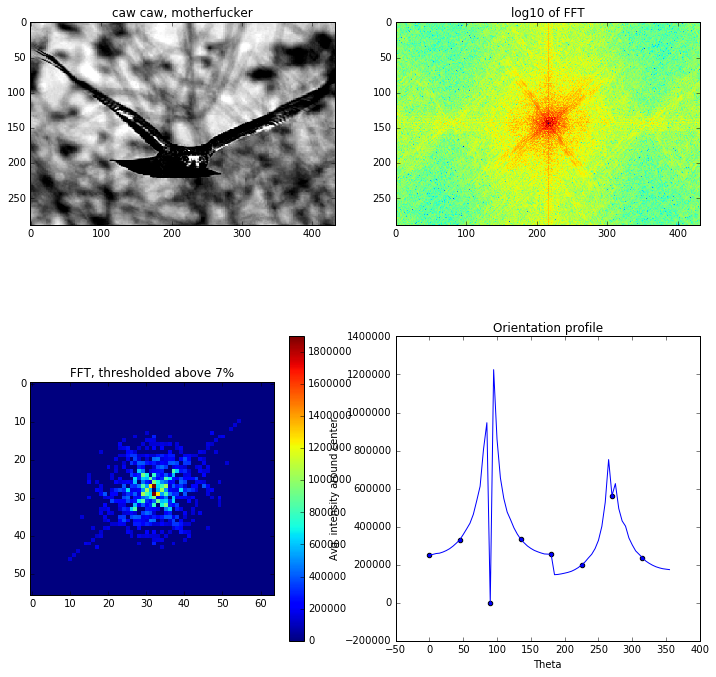

In [15]:
# pct_trials = [0.01, 0.03, 0.05, 0.07, 0.09]
pct_trials = [
#     0.01,
#     0.05,
    0.07
#     0.1,
]
num_pie_slices = 72
theta = [2 * n * np.pi / num_pie_slices for n in range(num_pie_slices)]
# pct = 0.05
for pct in pct_trials:
    pct_str = str(int(pct*100))
    for d in sweet_images:
        shifted_img, log_fft_img, radial_spectrum = ft.log_fourier_transform(d["image"])
        d["log_fft_image"] = log_fft_img

        fig = plt.figure(figsize=(12,12))

        a = fig.add_subplot(2,2,1)
        plt.title(d["description"])
        plt.imshow(shifted_img,cmap='gray',interpolation='nearest')

        a = fig.add_subplot(2,2,2)
        plt.imshow(log_fft_img,interpolation='nearest')
        plt.title("log10 of FFT")

        # now the big guns:
        # get the raw fourier transformed image:
        fft_raw = np.abs(fftpack.fftshift(fftpack.fft2(shifted_img)))
        threshold = pct * np.max(fft_raw)
        (x,y) = np.where(fft_raw > threshold)
        fft_threshold = fft_raw * (fft_raw > threshold)

        a = fig.add_subplot(2,2,3)
        plt.title("FFT, thresholded above " + pct_str + "%")
        plt.imshow(fft_threshold[np.min(x)-10:np.max(x)+10,np.min(y)-10:np.max(y)+10],interpolation='nearest')
        plt.colorbar()
        
        a = fig.add_subplot(2,2,4)
        M,N = fft_raw.shape
        x_0,y_0 = float(M)/2, float(N)/2
        r = np.hypot(x_0 - np.min(x), y_0 - np.min(y)) #overshooting a bit but that's ok.
        print("for " + d["description"] + ", coordinates are ",str(x_0),str(y_0),"radius is",r)
        theta_arr,intensity = ft.radial_image_intensity(fft_raw,x_0,y_0,r,theta,num_interp_points=1000)
        coarse_theta,coarse_intensity = ft.radial_image_intensity(fft_raw,x_0,y_0,r,num_interp_points=1000)
        
        plt.title("Orientation profile")
        a.plot([t * 180/np.pi for t in theta_arr],intensity)
        a.scatter([t * 180/np.pi for t in coarse_theta],coarse_intensity)
        plt.xlabel('Theta')
        plt.ylabel('Avg. intensity around center')

#         d["orientation " + pct_str + "%"] = ft.image_orientation(d["image"],fraction_of_peak=pct,degrees=True)
#         print('Orientation of ' + d["description"] + ', computed using ' + pct_str + '% threshold:' + str(d["orientation " + pct_str + "%"]) + ' degrees')
# for pct in pct_trials:
#     print('Orientation of ' + v_pencils_dict["description"] + ', computed using ' + str(int(100*pct)) + '% threshold: ' + str(v_pencils_dict["orientation " + str(pct)]))
#     print('Orientation of ' + h_pencils_dict["description"] + ', computed using ' + str(int(100*pct)) + '% threshold: ' + str(h_pencils_dict["orientation " + str(pct)]))

## Scratchwork, getting fourier transform in a useable state

In [ ]:
BEARSBEARSBEARS = imread('/Users/sekunder/python/SWDB/SWDB-KART/images/NS_stimulus_images/NS_0.png',flatten=True)
print(BEARSBEARSBEARS.shape)
plt.imshow(BEARSBEARSBEARS,cmap='gray',interpolation='nearest')

In [ ]:
BEARS_reduced = BEARSBEARSBEARS - np.mean(BEARSBEARSBEARS[:])
FFT_Bears = fftpack.fft2(BEARS_reduced)
FFT_shifted_Bears = np.abs(fftpack.fftshift(FFT_Bears))

max_magnitude = np.max(FFT_shifted_Bears)
print('max magnitude:',max_magnitude)
plt.figure()
plt.imshow(np.log(FFT_shifted_Bears))

percent = 0.08
theta = percent*max_magnitude
print('5% threshold:',theta)
FFT_thresholded = FFT_shifted_Bears * (FFT_shifted_Bears > theta)

(x,y) = np.where(FFT_shifted_Bears > theta)

plt.figure()
plt.imshow(FFT_thresholded[np.min(x)-10:np.max(x)+10,np.min(y)-10:np.max(y)+10],interpolation='nearest')
plt.colorbar()

In [ ]:
logbears,FFTbears, bear_spectrum = ft.log_fourier_transform(BEARSBEARSBEARS)
plt.figure()
plt.imshow(BEARSBEARSBEARS,cmap='gray')
plt.figure()
plt.imshow(logbears,cmap='gray')
plt.figure()
plt.imshow(FFTbears)
# ax[0].title('BEARS BEARS BEARS')
# ax[1].imshow(logbears)

## Misc scratchwork

In [ ]:
a = np.asarray([(1,2,3),(8,9,10)])
a[np.asarray([0,1,0]),np.asarray([1,2,2])]

In [ ]:
a.astype

In [ ]:
x, y = np.mgrid[-5:5:0.1, -5:5:0.1]
x0, y0 = 5, 4.5 # These are in _pixel_ coordinates!!
x1, y1 = 60, 75
z = np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2)
interp_pixels,ds = ft.interpolated_pixels(z, x0,y0, x1,y1, num_steps=100)
fig, axes = plt.subplots(nrows=2)
axes[0].imshow(z)
axes[0].plot([x0, x1], [y0, y1], 'ro-')
axes[0].axis('image')

d = np.hypot(x1-x0, y1-y0)
axes[1].plot(np.linspace(0,d,100),interp_pixels)
axes[1].bar(np.linspace(0,d,100),interp_pixels,width=ds)


In [ ]:
axes[1].bar